In [2]:
# Data handling and analysis

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Reading the dataset

df = pd.read_csv("premiums.csv")

In [4]:
# viewing top 5 rows

df.head()


,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


In [25]:
# Different values of BMI
bmi_values = df['BMI_Category'].unique()
bmi_values

array(['Normal', 'Obesity', 'Overweight', 'Underweight'], dtype=object)

In [6]:
df.tail()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
49995,24,Female,Northwest,Unmarried,0,Underweight,No Smoking,Self-Employed,25L - 40L,35,No Disease,Bronze,9111
49996,47,Female,Southeast,Married,2,Normal,No Smoking,Salaried,> 40L,82,Thyroid,Gold,27076
49997,21,Male,Northwest,Unmarried,0,Normal,Regular,Freelancer,25L - 40L,32,No Disease,Bronze,8564
49998,18,Male,Northwest,Unmarried,2,Normal,No Smoking,Salaried,10L - 25L,20,No Disease,Bronze,9490
49999,48,Female,Southwest,Married,3,Normal,Occasional,Self-Employed,<10L,7,Diabetes,Silver,19730


In [7]:
# finding random rows in data set

df.sample(5)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
7014,21,Female,Southeast,Unmarried,2,Underweight,No Smoking,Salaried,25L - 40L,29,No Disease,Bronze,4570
37618,33,Male,Southeast,Married,3,Underweight,No Smoking,Salaried,<10L,4,High blood pressure,Bronze,9167
35507,19,Male,Southeast,Married,3,Normal,Regular,Self-Employed,<10L,7,No Disease,Silver,9617
48541,21,Male,Northeast,Unmarried,0,Normal,Regular,Salaried,<10L,5,No Disease,Bronze,6492
7208,25,Female,Southwest,Unmarried,0,Normal,No Smoking,Freelancer,<10L,1,Thyroid,Bronze,9826


In [8]:
# Shape of data-set
df.shape

(50000, 13)

In [9]:
# Numerical column names

df.select_dtypes(include=['number']).columns

Index(['Age', 'Number Of Dependants', 'Income_Lakhs', 'Annual_Premium_Amount'], dtype='object')

In [10]:
# Categorical column names
df.select_dtypes(include=['object']).columns

Index(['Gender', 'Region', 'Marital_status', 'BMI_Category', 'Smoking_Status',
       'Employment_Status', 'Income_Level', 'Medical History',
       'Insurance_Plan'],
      dtype='object')

In [11]:
# DataTypes of columns
df.dtypes

Age                       int64
Gender                   object
Region                   object
Marital_status           object
Number Of Dependants      int64
BMI_Category             object
Smoking_Status           object
Employment_Status        object
Income_Level             object
Income_Lakhs              int64
Medical History          object
Insurance_Plan           object
Annual_Premium_Amount     int64
dtype: object

In [12]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    50000 non-null  int64 
 1   Gender                 50000 non-null  object
 2   Region                 50000 non-null  object
 3   Marital_status         50000 non-null  object
 4   Number Of Dependants   50000 non-null  int64 
 5   BMI_Category           50000 non-null  object
 6   Smoking_Status         49989 non-null  object
 7   Employment_Status      49998 non-null  object
 8   Income_Level           49987 non-null  object
 9   Income_Lakhs           50000 non-null  int64 
 10  Medical History        50000 non-null  object
 11  Insurance_Plan         50000 non-null  object
 12  Annual_Premium_Amount  50000 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.0+ MB


In [13]:
# Finding missing values
missing_values = df.isnull().sum() 
missing_values 

Age                       0
Gender                    0
Region                    0
Marital_status            0
Number Of Dependants      0
BMI_Category              0
Smoking_Status           11
Employment_Status         2
Income_Level             13
Income_Lakhs              0
Medical History           0
Insurance_Plan            0
Annual_Premium_Amount     0
dtype: int64

In [14]:
# Finding duplicated rows
df.duplicated().sum()

np.int64(0)

In [15]:
# Finding Unique values count for each column
df.nunique()

Age                         60
Gender                       2
Region                       4
Marital_status               2
Number Of Dependants         8
BMI_Category                 4
Smoking_Status               6
Employment_Status            3
Income_Level                 4
Income_Lakhs               110
Medical History              9
Insurance_Plan               3
Annual_Premium_Amount    23183
dtype: int64

In [16]:
# Printing unique values in each column
for col in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in Gender: ['Male' 'Female']
Unique values in Region: ['Northwest' 'Southeast' 'Northeast' 'Southwest']
Unique values in Marital_status: ['Unmarried' 'Married']
Unique values in BMI_Category: ['Normal' 'Obesity' 'Overweight' 'Underweight']
Unique values in Smoking_Status: ['No Smoking' 'Regular' 'Occasional' nan 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
Unique values in Employment_Status: ['Salaried' 'Self-Employed' 'Freelancer' nan]
Unique values in Income_Level: ['<10L' '10L - 25L' '> 40L' '25L - 40L' nan]
Unique values in Medical History: ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
Unique values in Insurance_Plan: ['Bronze' 'Silver' 'Gold']


In [17]:

# Summary statistics for numerical columns 
df.describe()

,Age,Number Of Dependants,Income_Lakhs,Annual_Premium_Amount
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,34.593480,1.712080,23.018200,15768.116320
std,15.000437,1.498248,24.219197,8419.839675
min,18.000000,-3.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13929.000000
75%,45.000000,3.000000,31.000000,22275.250000
max,356.000000,5.000000,930.000000,43471.000000


In [18]:

# Summary statistics for categorical columns 
df.describe(include=['object'])

,Gender,Region,Marital_status,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Medical History,Insurance_Plan
count,50000,50000,50000,50000,49989,49998,49987,50000,50000
unique,2,4,2,4,6,3,4,9,3
top,Male,Southeast,Unmarried,Normal,No Smoking,Salaried,<10L,No Disease,Bronze
freq,27480,17520,25681,23511,27366,20968,18667,21177,21573


In [19]:

# Imbalance check and value count for 'gender' column 
gender_counts = df['Gender'].value_counts()

print("value count of",gender_counts)
print("\nClass Distribution (Imbalance Check for Gender):")
print(df['Gender'].value_counts(normalize=True) * 100)

value count of Gender
Male      27480
Female    22520
Name: count, dtype: int64

Class Distribution (Imbalance Check for Gender):
Gender
Male      54.96
Female    45.04
Name: proportion, dtype: float64


In [20]:
# imbalance check and value count for 'smoking_status' column 

smoking_status_counts = df['Smoking_Status'].value_counts()

print("value count of ",smoking_status_counts)
print("\nClass Distribution (Imbalance Check for Smoking_Status):")
print(df['Smoking_Status'].value_counts(normalize=True) * 100)


value count of  Smoking_Status
No Smoking        27366
Regular           15686
Occasional         6915
Smoking=0             8
Not Smoking           8
Does Not Smoke        6
Name: count, dtype: int64

Class Distribution (Imbalance Check for Smoking_Status):
Smoking_Status
No Smoking        54.744044
Regular           31.378903
Occasional        13.833043
Smoking=0          0.016004
Not Smoking        0.016004
Does Not Smoke     0.012003
Name: proportion, dtype: float64


In [21]:

# kurt Imbalance check for numerical columns 

numeric_columns = df.select_dtypes(include=['number'])
for column in numeric_columns:
    kurt = numeric_columns.kurt()
print(f"Kurtosis of column : \n{kurt}\n")

Kurtosis of column : 
Age                       46.590177
Number Of Dependants      -0.991685
Income_Lakhs             155.676144
Annual_Premium_Amount     -0.822499
dtype: float64



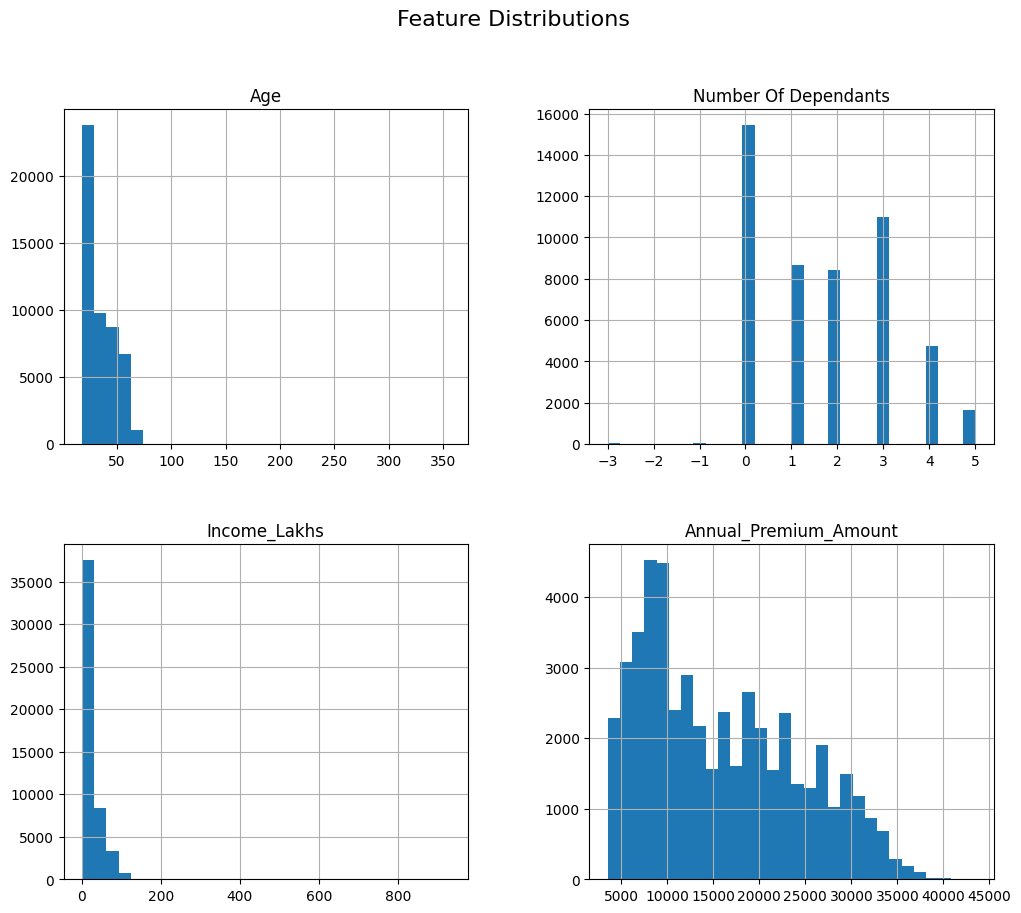

In [22]:

# Histogram for numerical columns 

df.hist(figsize=(12, 10), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()
     

C:\Users\rohit\AppData\Local\Temp\ipykernel_2340\4174797197.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")
C:\Users\rohit\AppData\Local\Temp\ipykernel_2340\4174797197.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")
C:\Users\rohit\AppData\Local\Temp\ipykernel_2340\4174797197.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


ValueError: num must be an integer with 1 <= num <= 3, not 4

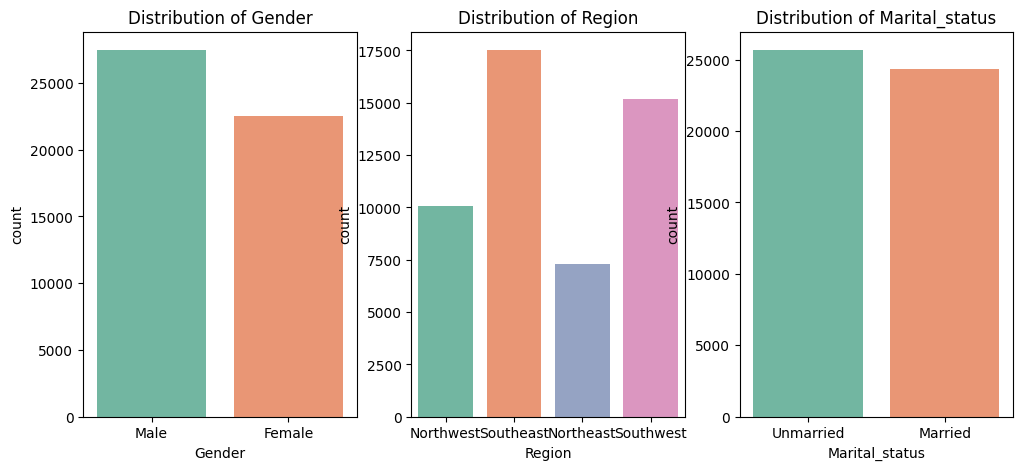

In [23]:

# Countplot for categorical variables 

categorical_features = df.describe(include=['object'])
plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f"Distribution of {col}")
    plt.xticks()
plt.tight_layout()
plt.show()


C:\Users\rohit\AppData\Local\Temp\ipykernel_22276\3076553900.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, palette="Set2")
C:\Users\rohit\AppData\Local\Temp\ipykernel_22276\3076553900.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, palette="Set2")
C:\Users\rohit\AppData\Local\Temp\ipykernel_22276\3076553900.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, palette="Set2")
C:\Users\rohit\AppData\Local\Temp\ipykernel_22276\3076553900.py:6: FutureWarning: 

Passing `palette` without as

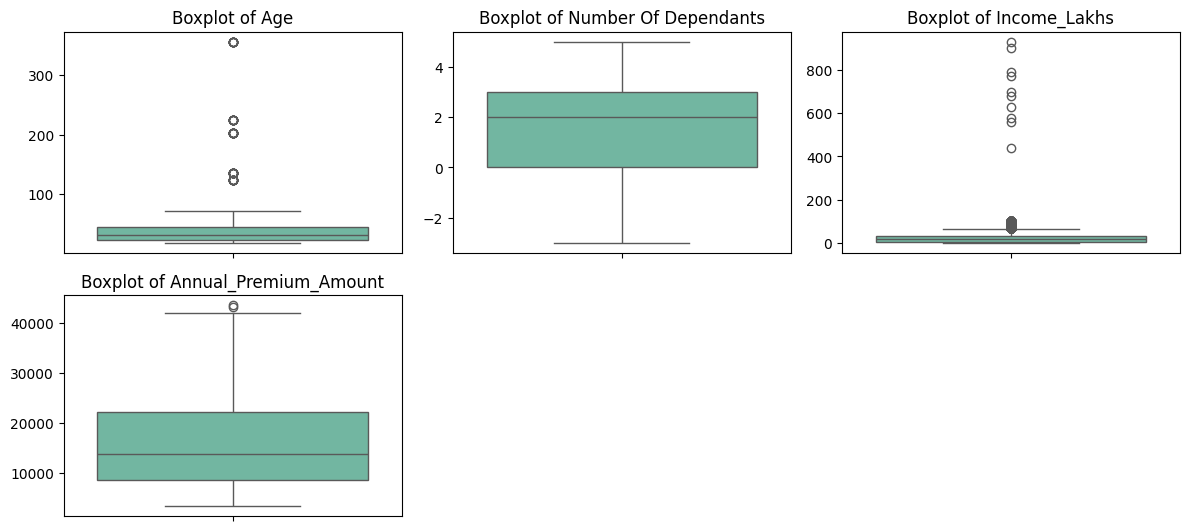

In [ ]:
# Boxplot for numerical features to check for outliers

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=col, palette="Set2")
    plt.title(f"Boxplot of {col}")
    plt.ylabel("")
plt.tight_layout()
plt.show()
     

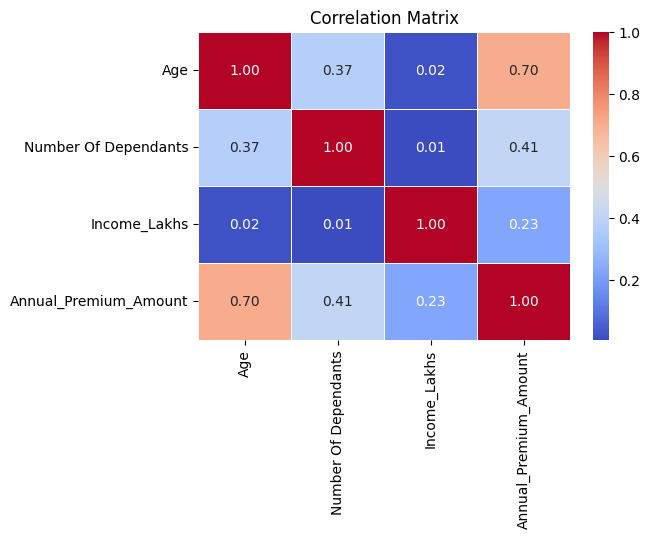

In [ ]:
# Correlation matrix (only for numerical features) 

plt.figure(figsize=(6,4))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Techniques used:
* Correlation matrix to find feature relationships.
* Boxplot for outliners.
* Histograms for variable distribution.
* Countplot for categorical variables.

# Data Preprocessing or Data Cleaning

In [ ]:

# Remove duplicate rows and verification of duplicate removal with help of size 

print("Shape before removing duplicates:", df.shape)
print("Number of duplicate rows:", df.duplicated().sum())
print("Number of duplicate columns:", df.columns.duplicated().sum())

# Conculsion: There is no duplicate rows or columns in the dataset.
# Hence, no need to remove duplicates.


Shape before removing duplicates: (50000, 13)
Number of duplicate rows: 0
Number of duplicate columns: 0


In [ ]:

# Handling Missing Values 

print("Missing values in each imputation:")  
print(df.isnull().sum())

Missing values in each imputation:
Age                       0
Gender                    0
Region                    0
Marital_status            0
Number Of Dependants      0
BMI_Category              0
Smoking_Status           11
Employment_Status         2
Income_Level             13
Income_Lakhs              0
Medical History           0
Insurance_Plan            0
Annual_Premium_Amount     0
dtype: int64


In [ ]:

# Creating separate copies for different imputation techniques 

df_mean = df.copy()
df_mode = df.copy()
df_median = df.copy()
df_interpolation = df.copy()
df_ffill = df.copy()
df_bfill = df.copy()

In [ ]:
# Retreving Numerical Columns 

numcols=df.select_dtypes(include=['number']).columns
numcols
print("Null-values in Numerical columns are:",df[numcols].isnull().sum())

# no null values in numerical columns, hence no need to impute numerical columns

Null-values in Numerical columns are: Age                      0
Number Of Dependants     0
Income_Lakhs             0
Annual_Premium_Amount    0
dtype: int64


In [ ]:
# Retreving categorical columns 

catcols=df.select_dtypes(include=['object']).columns
catcols

Index(['Gender', 'Region', 'Marital_status', 'BMI_Category', 'Smoking_Status',
       'Employment_Status', 'Income_Level', 'Medical History',
       'Insurance_Plan'],
      dtype='object')

In [ ]:

# Mode Imputation (For categorical columns) 

for col in catcols:
    mode_val = df_mode[col].mode()[0]
    df_mode[col] = df_mode[col].fillna(mode_val)
# Checking for null-values after mode imputation on categorical columns.
print("Missing values after mode imputation:")
print(df_mode.isnull().sum())

Missing values after mode imputation:
Age                      0
Gender                   0
Region                   0
Marital_status           0
Number Of Dependants     0
BMI_Category             0
Smoking_Status           0
Employment_Status        0
Income_Level             0
Income_Lakhs             0
Medical History          0
Insurance_Plan           0
Annual_Premium_Amount    0
dtype: int64


In [ ]:
# checking for null index's of BMI column before imputation 

BMInull_indexes  = df_interpolation[df_interpolation['BMI_Category'].isnull()].index
BMInull_indexes

Index([], dtype='int64')

In [ ]:
# Conclusion: There are no null numberical or categorical columns in the dataset.
# Hence, no need to impute any columns.